# Image Basics
## Goals
- Learn essential libraries for images
  - pillow, numpy, matplitlib
- Learn how to read, write and manipulate images.

In [ ]:
# cat.jpg 다운로드
!wget -O cat.jpg https://raw.githubusercontent.com/ozmig77/lecture_files/main/cat.jpg

In [ ]:
# Import essential modules
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read an image with PIL library
img = Image.open('cat.jpg')
# Display a PIL image
img

In [ ]:
# Save the image
img.save('save_cat.jpg')

In [ ]:
# Display the image with matplotlib library
plt.imshow(img)
plt.axis(False)
plt.show()

## Image as Grid of Pixels

In [ ]:
# Convert a PIL Image to a NumPy array
img_npy = np.array(img)

# Display the shape of the image NumPy array
print('Image shape:', img_npy.shape)

# Print the pixel values at positions [0, 0], [0, 1], [1, 0], [1, 1]
print('Pixel values at positions [0, 0], [0, 1], [1, 0], [1, 1]:')
print(img_npy[:2, :2])

# Display the data type of the image NumPy array
print('Data type of the image:', img_npy.dtype)

In [ ]:
img_npy.max()

In [ ]:
# Display an image NumPy array with matplotlib library
plt.imshow(img_npy)
plt.axis(False)
plt.show()

### Image Color

The shape of the image is (300, 450, 3). Then, what is the meaning of the 3 channels of the image?

In [ ]:
# Create images with only one channel and the rest set to zeros
img_npy_0 = np.array(img)
img_npy_0[:, :, [1, 2]] = 0 # Leave only the 1st channel (Red)

img_npy_1 = np.array(img)
img_npy_1[:, :, [2, 0]] = 0 # Leave only the 2nd channel (Green)

img_npy_2 = np.array(img)
img_npy_2[:, :, [0, 1]] = 0 # Leave only the 3rd channel (Blue)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 6))
axes[0].imshow(img_npy_0); axes[0].axis(False); axes[0].set_title('Red')
axes[1].imshow(img_npy_1); axes[1].axis(False); axes[1].set_title('Green')
axes[2].imshow(img_npy_2); axes[2].axis(False); axes[2].set_title('Blue')
plt.show()

### Practice 1
- Convert the color of the box containing a cute cat into red as the reference image.
- The box is positioned between (90, 190) and (240, 260).

![cat_red.jpg](https://raw.githubusercontent.com/yhytoto12/cv-lectures/main/assets/cat_red.jpg)

In [ ]:
img_npy = np.array(img)

############# TODO #############
# 1. change color
...

# 2. display image
...

### Crop an image

In [ ]:
img_npy = np.array(img)
img_cat = img_npy[90:240,190:260]

print(img_cat.shape)
plt.imshow(img_cat)
plt.axis(False)
plt.show()

### Image composition

In [ ]:
img_npy[90:240, 100:170] = img_cat

plt.imshow(img_npy)
plt.axis(False)
plt.show()

### Pixel-level image processings

![ip.png](https://raw.githubusercontent.com/yhytoto12/cv-lectures/main/assets/ip.jpg)

- 이미지 색 반전 (Invert)

In [ ]:
img_npy = np.array(img)
img_new = np.clip((img_npy / 255.0) ** 0.33 * 255.0, 0, 255).astype(np.uint8)

plt.imshow(img_new)
plt.axis(False)
plt.show()

- 저대비 (Lower Contrast)

In [ ]:
img_npy = np.array(img)
img_new = img_npy // 2

plt.imshow(img_new)
plt.axis(False)
plt.show()

- 밝기 올리기 (Lighten)
    - uint8 타입의 Overflow 현상이 있으므로 형 변환이 필요합니다

In [ ]:
img_npy = np.array(img)
img_new = img_npy + 128
# img_new = img_npy.astype(np.float64) + 128
# img_new = np.clip(img_new, 0, 255).astype(np.uint8)

plt.imshow(img_new)
plt.axis(False)
plt.show()

- 회색조 (RGB to Grayscale)
  - (H, W, 3) -> (H, W)
$$I(x, y) = (R(x, y) + G(x, y) + B(x, y)) / 3$$

In [ ]:
img_npy = np.array(img)

img_new = (img_npy[:,:,0] + img_npy[:,:,1] + img_npy[:,:,2]) / 3

plt.imshow(img_new, cmap='gray') # To output a grayscale image, add the cmap='gray' option.
# plt.imshow(img_new)
# plt.colorbar()
plt.axis(False)
plt.show()

## Transforming and augmenting images
Torchvision supports common computer vision transformations in the torchvision.transforms and torchvision.transforms.v2 modules. Transforms can be used to transform or augment data for training or inference of different tasks (image classification, detection, segmentation, video classification).

[pytorch image augmentation](https://pytorch.org/vision/stable/transforms.html)

In [ ]:
import torch
from torchvision.transforms import v2, ToTensor

In [ ]:
img = Image.open('cat.jpg')
IMAGE_SIZE = 224

transforms = v2.Compose([
    ToTensor(),
    v2.RandomResizedCrop(size=(IMAGE_SIZE, IMAGE_SIZE), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img = transforms(img)

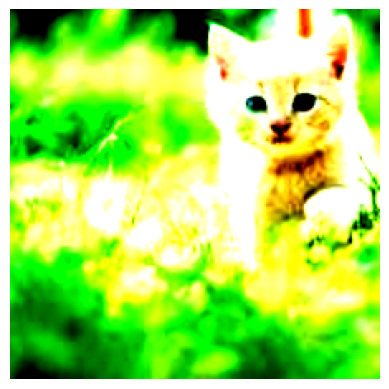

In [ ]:
# Display the image with matplotlib library
plt.imshow(img.permute(1, 2, 0))
plt.axis(False)
plt.show()

### Practice 2
There is a folder (`raw_images`) containing 50 images obtained from the internet.
We want to process each image as follows and save them in a new folder (`preprocessed_images`):

  - Convert to **grayscale**.
  - Resize to **128 x 128** pixels with preserving the aspect ratio. If the aspect ratio is not 1:1, crop the center part.
  
Hint:
- When you want to get the names of all files in a directory, you can use `os.listdir(directory_name)`.

In [ ]:
# Download images
!wget -O raw_images.zip https://raw.githubusercontent.com/yhytoto12/cv-lectures/main/assets/raw_images.zip
!unzip -q ./raw_images.zip

--2025-02-03 03:13:37--  https://raw.githubusercontent.com/yhytoto12/cv-lectures/main/assets/raw_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2679552 (2.6M) [application/zip]
Saving to: ‘raw_images.zip’

raw_images.zip      100%[===================>]   2.55M  --.-KB/s    in 0.08s   

2025-02-03 03:13:37 (33.9 MB/s) - ‘raw_images.zip’ saved [2679552/2679552]



In [ ]:
import os
from PIL import Image

import torchvision.transforms as transforms

############# TODO #############
# Create the output directory if it doesn't exist
output_dir = 'preprocessed_images'
os.makedirs(output_dir, exist_ok=True)

# 1. Define the transformation: convert to grayscale, resize to 128x128, and center crop
...

# Process each image in the raw_images directory
input_dir = 'raw_images'
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)
        img_transformed = transform(img)
        img_transformed.save(os.path.join(output_dir, filename))

print("Processing complete. Images saved in 'preprocessed_images' directory.")

Processing complete. Images saved in 'preprocessed_images' directory.
